# Gradient Descent

Changes to the inputs of a function have some effect on the output of that function. If we change the input by a lot, but the output doesn't change very much, then the effect of that input is small. If we change the input by a little and the output changes a lot, then the input has a large effect on the output. 

We can represent this change as a ratio 

\begin{equation*}
\frac{\text{change in output}}{\text{change in input}}
\end{equation*}

This ratio tells us the effect our input has. In other words 

\begin{equation*}
\text{change in input} \frac{\text{change in output}}{\text{change in input}} = \text{change in output}
\end{equation*}

If we have a function 

\begin{align}
x & = \text{input} \\
y & = \text{output} \\
y & = 3x + 1
\end{align}


With our function above `change in output/change in input = 3`

\begin{align}
\partial x & = \text{change in input} \\
\partial y & = \text{change in output} \\
\frac{\partial y}{\partial x} & = 3
\end{align}

Can you see why? Any change we make to `x` is multiplied 3 times to create `y`. 

This ratio also tells us the slope of the line at `x`. Because our slope is positive, increasing `x` means increasing `y`. Alternatively if we had a negative slope, increasing `x` would decrease `y`. Therefore, if we wanted the output `y` of our function to be lower, we could subtract from our current `x` value to do so.

<IPython.core.display.Javascript object>


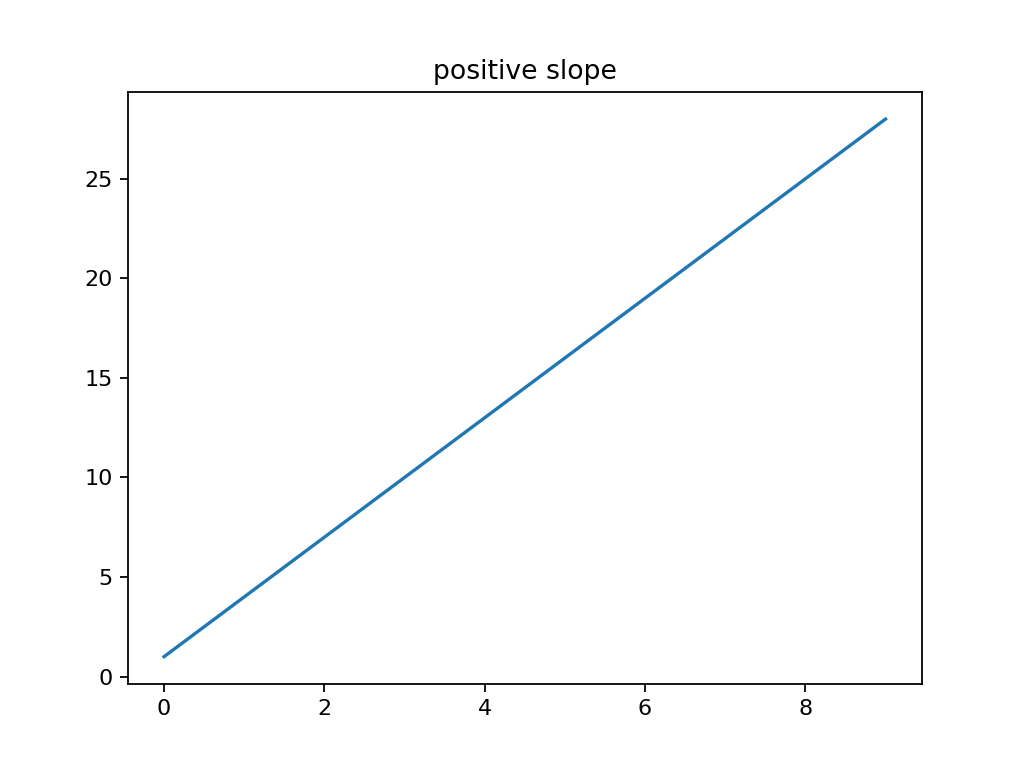

<IPython.core.display.Javascript object>


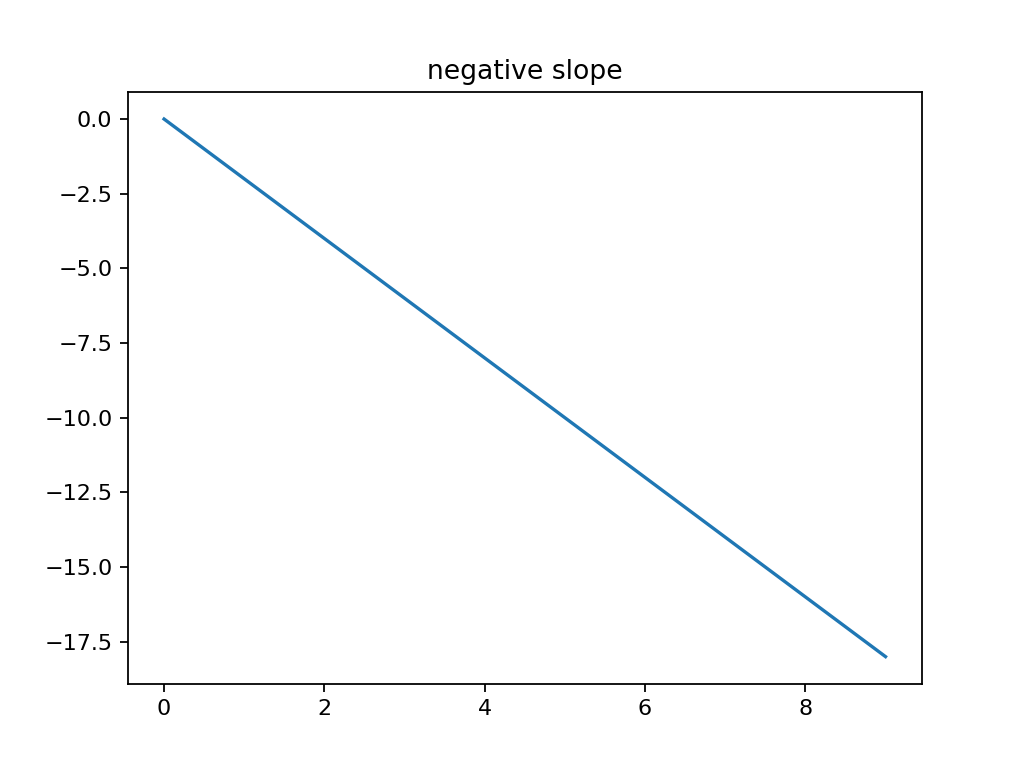

In [3]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(10)

# here we have a positive slope, if we increase x we increase y
y = 3*x + 1

# here we have a negative slope, increasing x decreases y
y2 = -2*x 

plt.figure('1')
plt.title('positive slope')
plt.plot(x, y)

plt.figure('2')
plt.title('negative slope')
plt.plot(x, y2)

plt.show()

Our functions don't have to be straight lines they can be any function we can take the derivative of. For instance 

\begin{equation*}
y = x^2 
\end{equation*}

The derivative of this function is 

\begin{equation*}
\frac{\partial y}{\partial x} = 2x
\end{equation*}

That means that given a certain `x` value, the slope of our function at that `x` value is `2x`. Therefore, when we plug in an x, if we want to decrease the output `y` of our function we can subtract from `x` if positive, or add to it if negative. This makes sense if we look at the graph of our function. To the left of `x = 0` our slope is negative, so to "roll" down the hill we need to move to the right. The opposite is true if `x > 0`.

<IPython.core.display.Javascript object>


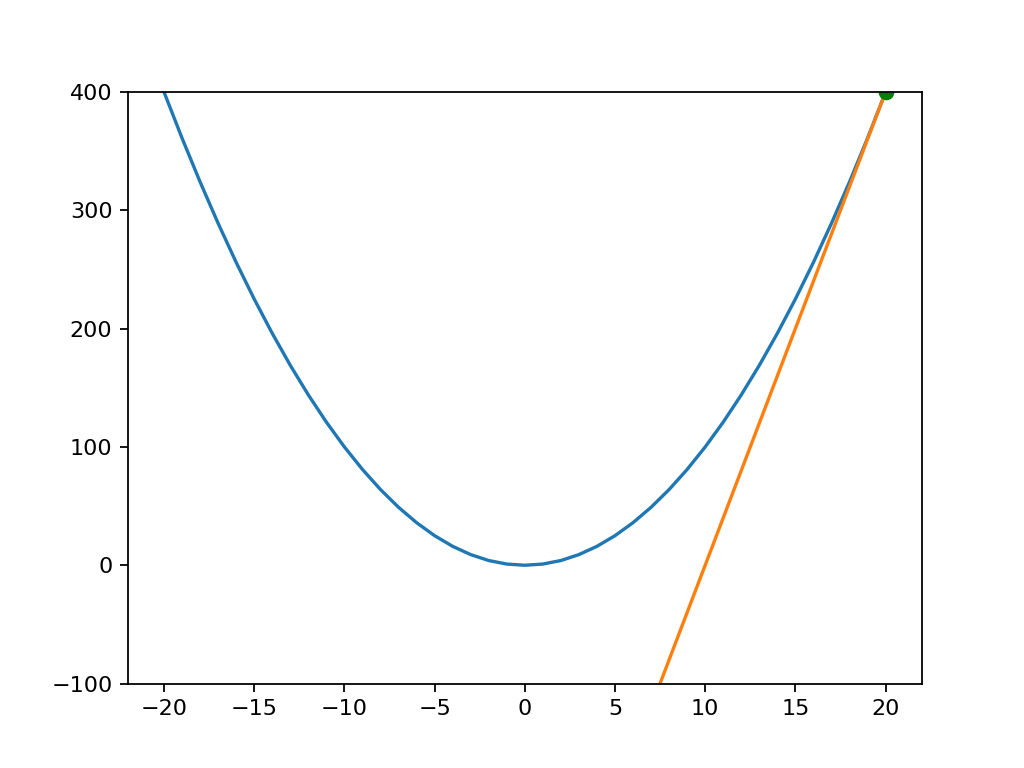

In [4]:
%matplotlib notebook
import time

fig = plt.figure()
ax = fig.add_subplot(111)

plt.ion()

fig.show()
fig.canvas.draw()

# This is simply a list of numbers from -20 to 20
x = np.arange(-20, 21)

# our function y = x^2
y = x**2

# the derivative / gradient / dy/dx which gives the 
# slope of the line at every point on our function
dy_dx = 2*x

# This y intercept makes our tangent line 
# sit in the currect place to touch the curve
# of our x^2 function
y_intercept = y - dy_dx*x


time.sleep(5)
#iterate - plot, erase
for (i, p) in enumerate(x):
    ax.clear() # - Clear
    
    # set the size of the graph to plot
    ax.set_ylim(bottom=-100, top=400)
    
    # plot our y = x^2 function
    ax.plot(x, y) 
    
    # plot the tangent line. In other words the line that 
    # represents the slope of our function at the current x value
    ax.plot(x, dy_dx[i]*x + y_intercept[i])
    
    # plot the point where the tangent line 
    # and the function intersect
    ax.plot(x[i], y[i], 'go')
    
    fig.canvas.draw()   # draw
    plt.show()
    time.sleep(0.01)    #sleep

The previous animation just shows how we can get the slope of the function at any point, but what if we actually want to roll down the hill like we said before. To do this we can add to x if our slope is negative or subtract from x if our slope is positive. In other words we want to go in the opposite direction of the slope or simply subtract the slope from x.

<IPython.core.display.Javascript object>


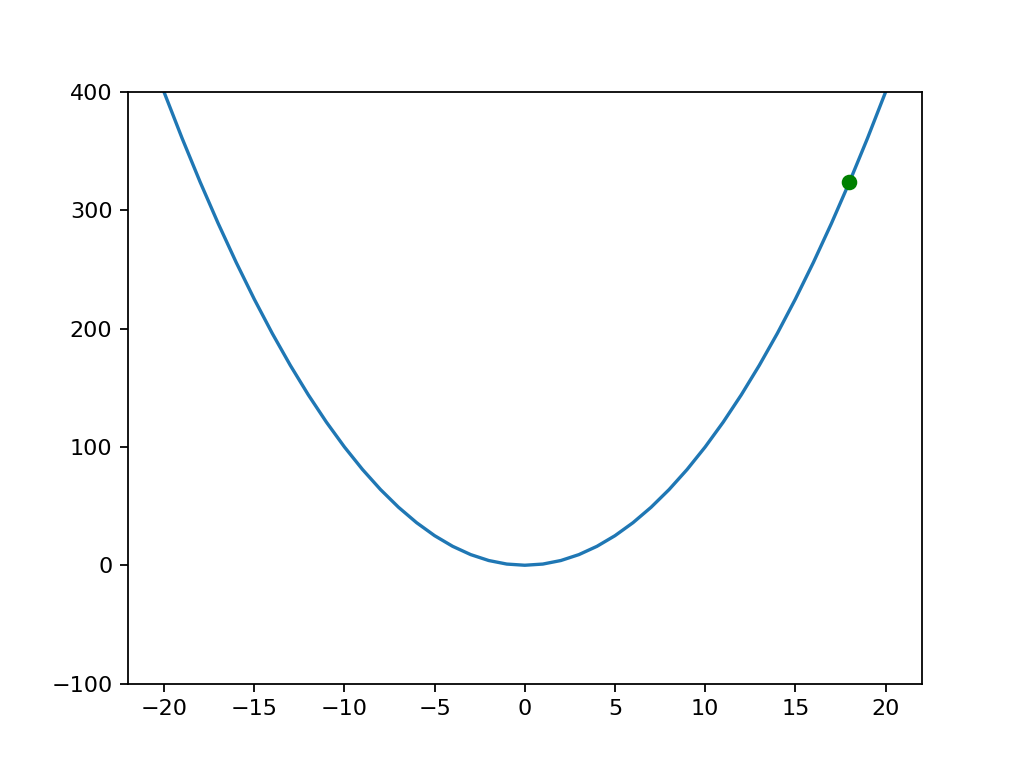

In [5]:
%matplotlib notebook

def gradient_descent(x, y, dy_dx, start_x = 18, learning_rate = 1, bottom=-100, top=400):
    fig = plt.figure()
    ax = fig.add_subplot(111)

    plt.ion()

    fig.show()
    fig.canvas.draw()

    # subtract the slope from starting x
    new_x = start_x - dy_dx(start_x)*learning_rate

    # plot our y = x^2 function
    ax.plot(x, [y(z) for z in x]) 

    # plot the current point 
    ax.plot(start_x, y(start_x), 'go')
    ax.plot(new_x, y(new_x), 'ro')

    #iterate - plot, erase
    for i in range(20):
        ax.clear() # - Clear

        # set the size of the graph to plot
        ax.set_ylim(bottom=bottom, top=top)

        # update our x value by subtracting the slope
        start_x = new_x
        new_x = start_x - dy_dx(start_x)*learning_rate

        # plot our y = x^2 function
        ax.plot(x, [y(z) for z in x]) 

        # plot the current point 
        ax.plot(start_x, y(start_x), 'go')

        fig.canvas.draw()   # draw
        plt.show()
        time.sleep(.01)    #sleep

# This is simply a list of numbers from -20 to 20
x = np.arange(-20, 21)

# pick an x to start at rolling
start_x = 18

# our actual functions that take in x values
# and return the output
def y(x): return x**2
def dy_dx(z): return 2*z

gradient_descent(x, y, dy_dx, start_x = 18)

So What gives??? we subtract the slope from our x value to try and move down, but we end up just jumping back and fourth. Let's run through what's happening. our starting x value is 18 and the 


\begin{equation*}
\frac{\partial y}{\partial x} = 2x = 36
\end{equation*}

So we subtract 36 from 18 and get -18. Now our 

\begin{equation*}
\frac{\partial y}{\partial x} = 2x = -36
\end{equation*}


so we take `-18 - 36 = 18`. Now we're right back where we started. So we know we still need to subtract the slope, but not 100% of it. Maybe we can shrink it a little so we don't make such a big jump with our x when we update it. This is where the learning rate comes it. It is how much we shring the slope by when we subtract it from x so that the "ball" doesn't just bounce back and fourth.

<IPython.core.display.Javascript object>


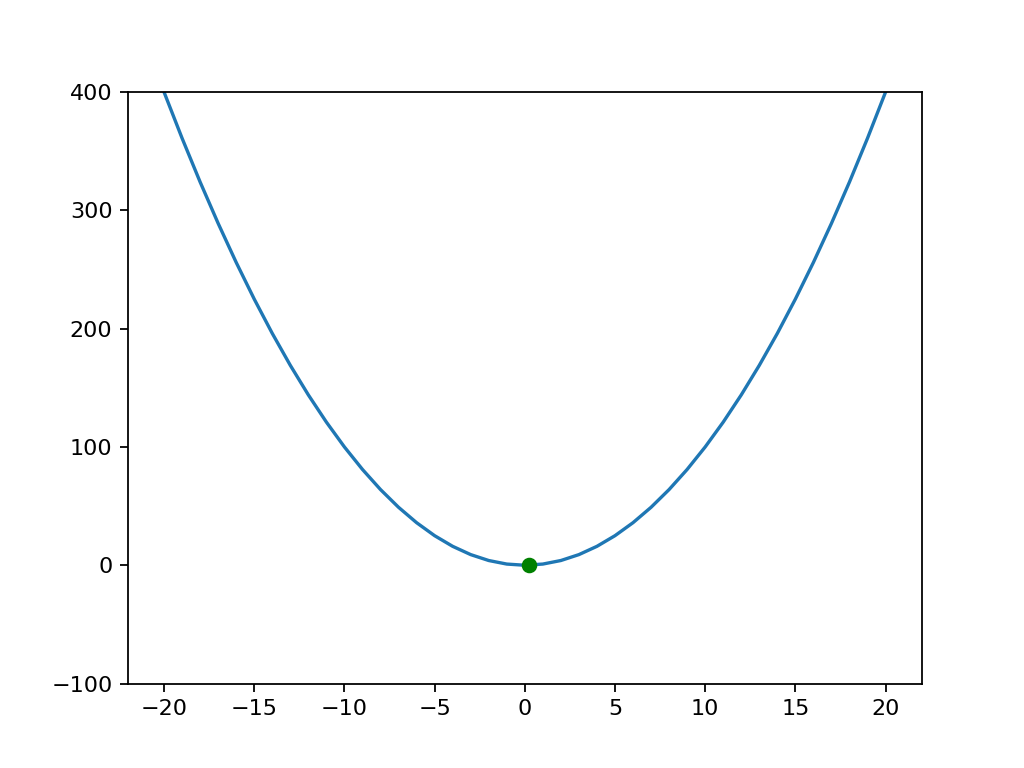

In [6]:
gradient_descent(x, y, dy_dx, start_x = 20, learning_rate=.1)

# Actual Learning

So how do we apply gradient descent to learning? This is where our cost function comes in. If the gradient we're trying to roll down represents the cost, then we're trying to minimize the cost. So what cost are we talking about. Let's use our linear regression example. We have some data that represents house price and number of sqaure feet. So we expect a positive relationship that as number of square feet goes up, house price also goes up. We want to find the line that best fits the data so that when we get a new house we can predict it's cost. This line has some slope and some y intercept that we are trying to find. This is where learning and gradient descent comes in. We can randomly try a line and take the difference of all the points from the line. Summing up all the differences gives us a cost and that is what we want to minimize using gradient descent. Once the cost is minimized it means our line is as close to the data as it can be meaning it should give a good prediction of future house prices.

<IPython.core.display.Javascript object>


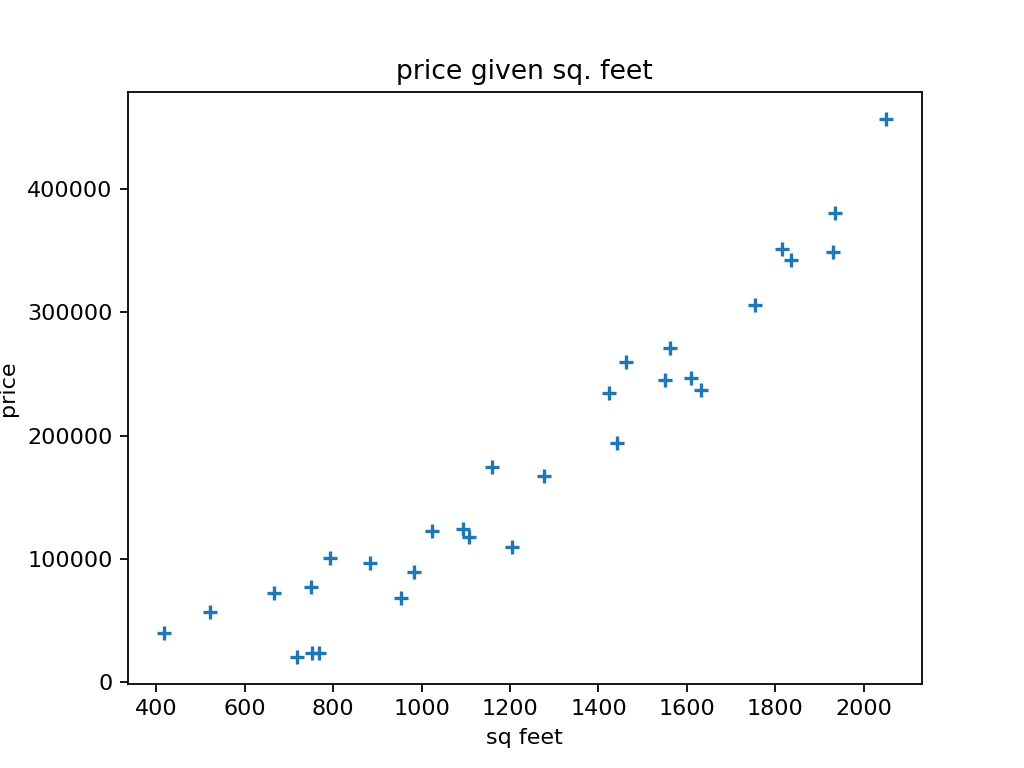

In [7]:
%matplotlib notebook
from random import randint
# I am going to make up a fake dataset of 
# sq. feet to house prices

sq_feet = np.arange(500, 2000, 50)
sq_feet = [x + randint(-100, 100) for x in sq_feet]
def fake_y(x): return (1/10)*x**2 + randint(-50000, 50000)
house_prices = np.array([fake_y(x) for x in sq_feet])

plt.title('price given sq. feet')
plt.ylabel('price')
plt.xlabel('sq feet')
plt.scatter(sq_feet, house_prices, marker='+')
plt.show()


So we have a relationship between square feet and house price that is based on the function 

\begin{equation*}
price = \frac{1}{10}x^2 + rand(-50000, 50000)
\end{equation*}


I just made this up and it is obviously not linear. However, we're going to try to find the best fit line for this data using gradient descent. So we are going to start with a random slope and y intercept, calculate how far off we are from each of the actual points, then move down the gradient. Because we're dealing with two variables, slope and y intercept, our cost function will be 3D. The two inputs to the cost function are the slope and y intercept of our line, and the output is the cost. In this case our inputs are fixed, they are the datapoints we're trying to fit of (sq feet, house price) pairs. Those values don't change, but our slope and y intercept does. Therefore, the "input" to our function, or the things that we will be changing, are the slope and y intercept of our best fit line.

Because we want to find the best slope and y intercept to minimize the cost function, we need to find their gradients. We can do this using the chain rule because we're chaining multiple operations together. The first operation is the function of our best fit line and the second is finding the cost. We can multiply the gradients of each together to find the gradient of the best fit line slope in the cost function. We can do the same for the y intercept.

\begin{align}
w & = \text{slope} \\
b & = \text{y intercept} \\
y & = mx + b
\end{align}

Now instead of finding the `(change in output)/(change in input x)` we want to find the `(change in output)/(change in slope w)` and also the `(change in output)/(change in y intercept b)`.

\begin{align}
\frac{\partial y}{\partial w} & = x \\
\frac{\partial y}{\partial b} & = 1
\end{align}

What we ultimately want to find is how our slope and y intercept affect the final cost and we can do this by finding the gradient using chain rule. The effect that the slope has on the cost is `(change in cost)/(change in slope w)`. We can find this value by multiplying the gradient of the best fit line with respect to the slope by the gradient of the cost function with respect to it's input `y` which is the output of our best fit line. In other words

\begin{equation*}
\frac{\partial C}{\partial w} = \frac{\partial C}{\partial y} \frac{\partial y}{\partial w}
\end{equation*}


Because we have a $\partial y$ on the top and the bottom of the fraction, they cancel out and we are left with the effect that a change in the slope has on the final cost. we know the value of $\frac{\partial y}{\partial w}$ which is just the input value $x$ so now we just have to find what effect $y$ has on the output of the cost function $C$. In other words we just need to find $\frac{\partial C}{\partial y}$

\begin{align}
C & = \frac{1}{2}(\text{house price} - y)^2 \\
\frac{\partial C}{\partial y} & = y - \text{house price}
\end{align}

Now we can multiply the two terms together to get the effect that the slope has on the final cost.

\begin{align}
\frac{\partial y}{\partial w} & = x \\
\frac{\partial C}{\partial y} & = y - \text{house price} \\
\frac{\partial C}{\partial w} & = \frac{\partial C}{\partial y} \frac{\partial y}{\partial w} \\
\frac{\partial C}{\partial w} & = x(y - \text{house price})
\end{align}


You may be wondering why we're using this specific cost function. There are a couple of reasons. The first is that, as you may have noticed, its derivative is very simple. The second is that this function, when used on a vector, is basically the $length^2$ of the vector. So to find the length of a vector we use Pythagorean theorum $a^2 + b^2 = c^2$ where the length $c = \sqrt{a^2 + b^2}$. If we take the $length^2 = a^2 + b^2$. So what about the $\frac{1}{2}$ part? That is so that when we take the derivative, the 2 from the exponent cancels out. The third reason for using this function is that is has a guaranteed minimum. Because it represents a parabola in the form $y = x^2$ there will always be a lowest possible value which is the point we want to reach.

Now in order to find the gradient of our slope (i.e. the amount we need to subtract from it so that we lower the final cost function) we just need the input value x which is the number of square feet of our house, the y value which is the output from our best fit line "prediction" of house price, and the actual price of the house given the square feet which we can get from the data point of `(sq feet, house price)` example.

We can do the same process we did before for our y intercept value to find it's gradient with respect to the cost function. 

\begin{align}
\frac{\partial y}{\partial b} & = 1 \\
\frac{\partial C}{\partial y} & = y - \text{house price} \\
\frac{\partial C}{\partial b} & = \frac{\partial C}{\partial y} \frac{\partial y}{\partial b} \\
\frac{\partial C}{\partial w} & = y - \text{house price}
\end{align}

Now we know how to find the gradient of our slope and y intercept with respect to the final cost function which allows us to perform gradient descent. 

<IPython.core.display.Javascript object>


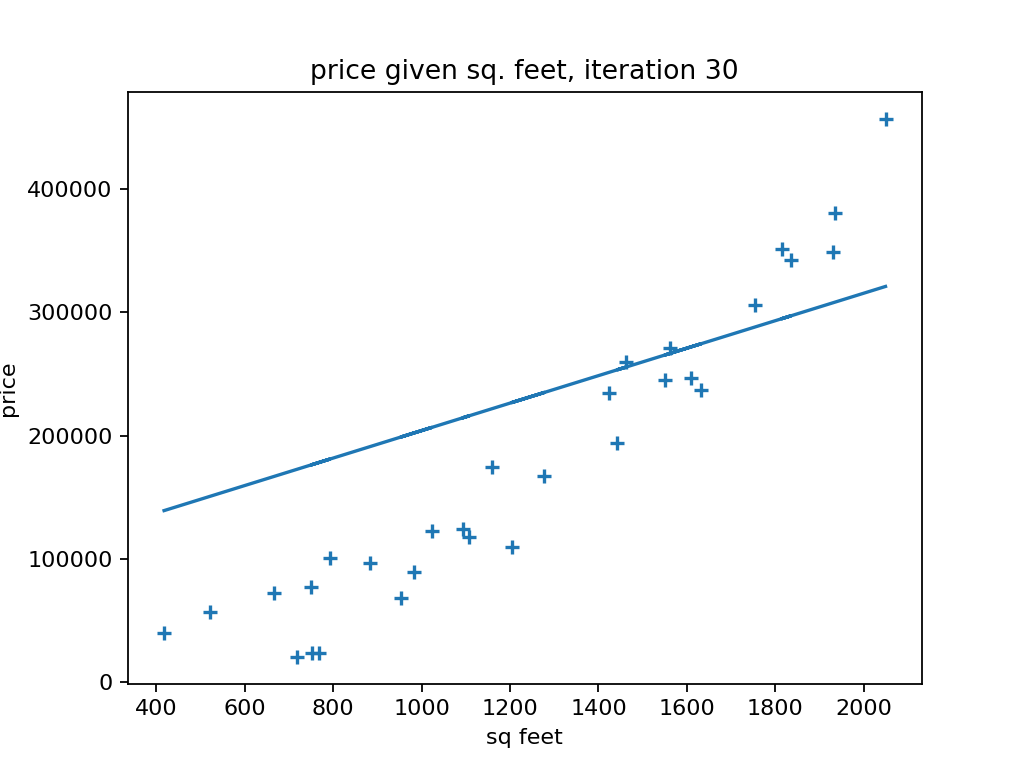

In [15]:
%matplotlib notebook
from random import uniform
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

slope = uniform(200, 600)
y_intercept = uniform(0, 300000)

# We manually tune the learning rate
# and it affects how much we change the slope
# and y intercept by when we find their 
# gradients
learning_rate = .00000004

plt.ion()

fig = plt.figure()
ax = fig.add_subplot(111)

def replot_best_fit(sq_ft, hse_prcs, slp, y_int):
    """
    Clear the canvas and replot the data along with 
    its best fit line
    """
    fig.show()
    fig.canvas.draw()      
    ax.clear()
    
    plt.scatter(sq_ft, hse_prcs, marker='+')
    plt.plot(sq_ft, [best_fit_line(x, slp, y_int) for x in sq_ft])

    fig.canvas.draw()   # draw
    plt.show()


def best_fit_line(x, slope, y_int):
    return slope*x + y_int

def dy_dw(x): return x
dy_db =  1

def dC_dy(y, house_price): return y - house_price

def find_gradients(slope, y_intercept):
    # this array represents the gradients for our slope for each of the houses
    dC_dws = np.zeros(len(sq_feet))
    # this array represents the gradients for our y intercept for each of the houses
    dC_dbs = np.zeros(len(sq_feet))

    # this is where we find the gradients of slope and y intercept for every input house
    for i in range(len(sq_feet)):
        x, house_price = sq_feet[i], house_prices[i]
        y = best_fit_line(x, slope, y_intercept)

        # get the gradient of the cost function with
        # respect to its input y
        dC_dy_val = dC_dy(y, house_price)

        # get the gradients for the slope and y 
        # intercept of our best fit line and
        # multiply by the grandient of the cost 
        # function to get the gradient of the
        # cost function with respect to the slope
        # and y intercept of the best fit line
        dC_dw = dC_dy_val * dy_dw(x)
        dC_db = dC_dy_val * dy_db

        # add the gradients to our lists
        dC_dws[i] = dC_dw
        dC_dbs[i] = dC_db

    return dC_dws, dC_dbs


for i in range(30):
    
    # find the gradients for all the house examples given
    # the current slope and y intercept
    dC_dws, dC_dbs = find_gradients(slope, y_intercept)
    
    # here we take the average of all the gradients
    # for our slope and y intercept across all input
    # data points which are our houses
    dC_dw_mean = sum(dC_dws)/len(dC_dws)
    dC_db_mean = sum(dC_dbs)/len(dC_dbs)

    # THIS IS THE LEARNING!!!
    # here we update our slope and y intercept to "roll"
    # down the gradients
    slope = slope - dC_dw_mean*learning_rate
    y_intercept = y_intercept - dC_db_mean*learning_rate
    
    # show the new best fit line
    replot_best_fit(sq_feet, house_prices, slope, y_intercept)
    
    # print the titles and which iteration we're on
    plt.title('price given sq. feet, iteration {}'.format(i+1))
    plt.ylabel('price')
    plt.xlabel('sq feet')
    time.sleep(.1)    #sleep
    


If you run the above example several times you will see that sometimes it's really good and other times it's not. However, It does converge to some minimum cost value where it evens out the distances of all the points to the line. It usually starts off very far away and gradually gets closer to the data points. When the changes to the slope and y intercept get smaller and smaller you can see that the line moves very little. This corresponds to the ball reaching the bottom of a hill like we saw with the parabola example. This parameter tuning is exactly what we do for the weights of our neural network. 